- O primeiro passo é importar as bibliotecas relevantes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- Lendo o CSV em um DataFrame. Alterar o caminho caso necessário

In [2]:
df = pd.read_csv('./data/news_data_final.csv')

# Fixando seed

- Fazemos isso para que o notebook tenha resultados uniformes quando executado (métodos como `DataFrame.sample()` utilizam aleatoriedade)

In [3]:
np.random.seed(123123)

In [4]:
df

_id  \
0               61073a280f87cd311d76fc6a   
1               61073a280f87cd311d76fc6b   
2               61073a280f87cd311d76fc6c   
3               61073a280f87cd311d76fc6d   
4               61073a280f87cd311d76fc6e   
...                                  ...   
6806  ObjectId(614343a804dc2b673fa0ad13)   
6807  ObjectId(614343a804dc2b673fa0ad14)   
6808  ObjectId(614343a804dc2b673fa0ad15)   
6809  ObjectId(614343a904dc2b673fa0ad16)   
6810  ObjectId(614343c504dc2b673fa0ad28)   

                                                  title        date  \
0     COVID-19 vaccines likely activate strong, last...  2021-07-06   
1             Why some horses lose the ability to sweat  2021-06-23   
2       Is climate change making allergy season longer?  2021-07-06   
3         Chestnut leaf molecule disarms staph bacteria  2021-07-06   
4     Scales show massive shark decline since prehis...  2021-07-07   
...                                                 ...         ...   
6806  NIH Spending Nearly $470 Million on Long-Haul ...  2021-09-16   
6807  Regular Exercise Can Lower Anxiety Risk by Mor...  2021-09-16   
6808               How Effective Is Your Homemade Mask?  2021-09-16   
6809  Hospitalizing the Unvaccinated Has Cost U.S. N...  2021-09-16   
6810  Did the coronavirus jump from animals to peopl...  2021-09-16   

                                                   text  \
0     Researchers have found evidence that the immun...   
1     For the first time, researchers have identifie...   
2     Researchers have found that changes in tempera...   
3     A molecule extracted from European chestnut tr...   
4     Shark abundance in Caribbean Panama has declin...   
...                                                 ...   
6806  THURSDAY, Sept. 16, 2021 (HealthDay News) -- T...   
6807                                                NaN   
6808  THURSDAY, Sept. 16, 2021 (HealthDay News) -- I...   
6809  THURSDAY, Sept. 16, 2021 (HealthDay News) -- T...   
6810  SARS-CoV-2, the virus that causes COVID-19, co...   

                                                    url   craw_date  \
0     https://www.futurity.org/how-long-does-covid-1...  2021-07-07   
1     https://www.futurity.org/horses-sweat-chronic-...  2021-07-07   
2     https://www.futurity.org/climate-change-allerg...  2021-07-07   
3     https://www.futurity.org/chestnut-leaf-bacteri...  2021-07-07   
4     https://www.futurity.org/shark-scales-fossils-...  2021-07-07   
...                                                 ...         ...   
6806  https://consumer.healthday.com/b-9-16-nih-spen...  2021-09-16   
6807  https://consumer.healthday.com/regular-exercis...  2021-09-16   
6808  https://consumer.healthday.com/b-9-16-how-effe...  2021-09-16   
6809  https://consumer.healthday.com/b-9-16-hospital...  2021-09-16   
6810  https://www.nature.com/articles/d41586-021-025...  2021-09-16   

         crawler  
0       Futurity  
1       Futurity  
2       Futurity  
3       Futurity  
4       Futurity  
...          ...  
6806  Health Day  
6807  Health Day  
6808  Health Day  
6809  Health Day  
6810      Nature  

[6811 rows x 7 columns]

# Análise exploratória

In [5]:
df.crawler.value_counts()

Medical Xpress          2551
News Medical            1439
Health Day              1139
Futurity                 271
MIT News                 211
Science Alert            139
Medical News Today       133
R&D World                123
Nature                   120
Science News             111
Live Science             106
IEEE Spectrum             91
The Scientist             89
World Pharma News         56
SCI News                  40
Tech News World           37
The Bottom Line           37
Institut Pasteur          26
Broad Institute           21
Smithsonian Magazine      20
CMAJ News                 17
Research Live             16
Wyss Institute            16
Name: crawler, dtype: int64

<AxesSubplot:>

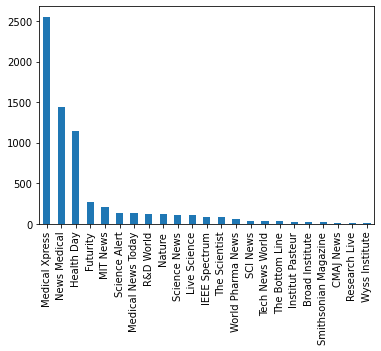

In [6]:
df.crawler.value_counts().plot(kind='bar')

- De que area de conhecimento se tratam os artigos?
- Retirando uma amostra para ter uma ideia

In [7]:
sample = df.sample(20)
for text in sample.title.values:
  print(text, end='\n=================\n')

New restrictions in Finland as COVID cases hit record
How fitness helps children develop deeper vocabularies
Pentagon to Make COVID-19 Vaccination Mandatory for Military
Sandia-led center to advance understanding of new solar panel technology
Research Roundup: September 3, 2021
EU signs initial deal with Novavax for COVID vaccine
Topical molecular imaging tracer enables real-time detection of cervical cancer
Stimulus program increased low-income population’s spending, study reveals
Heart age test a 'wake up call' for those at risk
Double vaccination halves risk of Long COVID
Research finds that US sick leave policies widen racial inequalities, lag nearly every other country
A multi-scale cryo-correlative platform to image SARS-CoV-2 in Vero cells
Kids' Temporary Tattoos Can Harm Skin Function
Sponge-like fossil could be Earth’s earliest known animal
The most ancient supermassive black hole is bafflingly big
Cannabis use spiked, but methamphetamine use plunged in Australia during COVID-

- Aparentemente, principalmente área de ciências médicas, biológicas, etc

- Curiosidade: quantos artigos mencionam COVID?

In [8]:
temp = df.dropna(subset=['text'])
temp[temp.text.str.contains('(covid)|(sars)', case=False)]

/home/ikedaleo/.local/lib/python3.9/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


_id  \
0               61073a280f87cd311d76fc6a   
10              61073a280f87cd311d76fc74   
12              61073a280f87cd311d76fc76   
15              61073a280f87cd311d76fc79   
19              61073a280f87cd311d76fc7d   
...                                  ...   
6804  ObjectId(614343a804dc2b673fa0ad11)   
6806  ObjectId(614343a804dc2b673fa0ad13)   
6808  ObjectId(614343a804dc2b673fa0ad15)   
6809  ObjectId(614343a904dc2b673fa0ad16)   
6810  ObjectId(614343c504dc2b673fa0ad28)   

                                                  title        date  \
0     COVID-19 vaccines likely activate strong, last...  2021-07-06   
10    Past coronavirus ‘memories’ may explain mild C...  2021-07-06   
12    New face mask prototype can detect Covid-19 in...  2021-06-28   
15                           Giving robots better moves  2021-07-01   
19     Letter from President Reif: A new future for edX  2021-06-29   
...                                                 ...         ...   
6804  Biden Administration Buys More Monoclonal Anti...  2021-09-16   
6806  NIH Spending Nearly $470 Million on Long-Haul ...  2021-09-16   
6808               How Effective Is Your Homemade Mask?  2021-09-16   
6809  Hospitalizing the Unvaccinated Has Cost U.S. N...  2021-09-16   
6810  Did the coronavirus jump from animals to peopl...  2021-09-16   

                                                   text  \
0     Researchers have found evidence that the immun...   
10    New research hints that people with COVID-19 m...   
12    Engineers at MIT and Harvard University have d...   
15    For most people, the task of identifying an ob...   
19    To the members of the MIT community, I write t...   
...                                                 ...   
6804  THURSDAY, Sept. 16, 2021 (HealthDay News) -- A...   
6806  THURSDAY, Sept. 16, 2021 (HealthDay News) -- T...   
6808  THURSDAY, Sept. 16, 2021 (HealthDay News) -- I...   
6809  THURSDAY, Sept. 16, 2021 (HealthDay News) -- T...   
6810  SARS-CoV-2, the virus that causes COVID-19, co...   

                                                    url   craw_date  \
0     https://www.futurity.org/how-long-does-covid-1...  2021-07-07   
10    https://www.futurity.org/mild-covid-coronaviru...  2021-07-07   
12    https://news.mit.edu/2021/face-mask-covid-19-d...  2021-07-07   
15    https://news.mit.edu/2021/righthand-robotics-0701  2021-07-07   
19    https://news.mit.edu/2021/letter-president-rei...  2021-07-07   
...                                                 ...         ...   
6804  https://consumer.healthday.com/b-9-16-biden-ad...  2021-09-16   
6806  https://consumer.healthday.com/b-9-16-nih-spen...  2021-09-16   
6808  https://consumer.healthday.com/b-9-16-how-effe...  2021-09-16   
6809  https://consumer.healthday.com/b-9-16-hospital...  2021-09-16   
6810  https://www.nature.com/articles/d41586-021-025...  2021-09-16   

         crawler  
0       Futurity  
10      Futurity  
12      MIT News  
15      MIT News  
19      MIT News  
...          ...  
6804  Health Day  
6806  Health Day  
6808  Health Day  
6809  Health Day  
6810      Nature  

[2998 rows x 7 columns]

In [9]:
df[df.title.str.contains('(covid)|(sars)', case=False)]

/home/ikedaleo/.local/lib/python3.9/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


_id  \
0               61073a280f87cd311d76fc6a   
10              61073a280f87cd311d76fc74   
12              61073a280f87cd311d76fc76   
67              61073a280f87cd311d76fcad   
69              61073a280f87cd311d76fcaf   
...                                  ...   
6796  ObjectId(614343a604dc2b673fa0ad08)   
6798  ObjectId(614343a704dc2b673fa0ad0a)   
6799  ObjectId(614343a704dc2b673fa0ad0b)   
6800  ObjectId(614343a804dc2b673fa0ad0d)   
6806  ObjectId(614343a804dc2b673fa0ad13)   

                                                  title        date  \
0     COVID-19 vaccines likely activate strong, last...  2021-07-06   
10    Past coronavirus ‘memories’ may explain mild C...  2021-07-06   
12    New face mask prototype can detect Covid-19 in...  2021-06-28   
67    How relocating musicians can reduce COVID-19 r...  2021-06-23   
69    How antibodies may cause rare blood clots afte...  2021-07-07   
...                                                 ...         ...   
6796  Considerations for Use of COVID-19 Vaccine Boo...  2021-09-15   
6798  COVID-19 Vaccines for Children Under 12 Could ...  2021-09-15   
6799  WHO Says Africa Will Get 30 Percent of COVID-1...  2021-09-15   
6800  Even When Undergoing Treatment, People With MS...  2021-09-16   
6806  NIH Spending Nearly $470 Million on Long-Haul ...  2021-09-16   

                                                   text  \
0     Researchers have found evidence that the immun...   
10    New research hints that people with COVID-19 m...   
12    Engineers at MIT and Harvard University have d...   
67    When the Utah Symphony performed this spring, ...   
69    Some COVID-19 vaccines have been linked to dan...   
...                                                 ...   
6796  WEDNESDAY, Sept. 15, 2021 (HealthDay News) -- ...   
6798  WEDNESDAY, Sept. 15, 2021 (HealthDay News) -- ...   
6799  WEDNESDAY, Sept. 15, 2021 (HealthDay News) -- ...   
6800  THURSDAY, Sept. 16, 2021 (HealthDay News) -- M...   
6806  THURSDAY, Sept. 16, 2021 (HealthDay News) -- T...   

                                                    url   craw_date  \
0     https://www.futurity.org/how-long-does-covid-1...  2021-07-07   
10    https://www.futurity.org/mild-covid-coronaviru...  2021-07-07   
12    https://news.mit.edu/2021/face-mask-covid-19-d...  2021-07-07   
67    https://www.sciencenews.org/article/coronaviru...  2021-07-07   
69    https://www.sciencenews.org/article/coronaviru...  2021-07-07   
...                                                 ...         ...   
6796  https://consumer.healthday.com/considerations-...  2021-09-16   
6798  https://consumer.healthday.com/covid-19-vaccin...  2021-09-16   
6799  https://consumer.healthday.com/who-says-africa...  2021-09-16   
6800  https://consumer.healthday.com/b-9-16-even-und...  2021-09-16   
6806  https://consumer.healthday.com/b-9-16-nih-spen...  2021-09-16   

           crawler  
0         Futurity  
10        Futurity  
12        MIT News  
67    Science News  
69    Science News  
...            ...  
6796    Health Day  
6798    Health Day  
6799    Health Day  
6800    Health Day  
6806    Health Day  

[1780 rows x 7 columns]

- Cerca de metade dos textos aparentam mencionar COVID de alguma forma
- Título provavelmente dá uma noção melhor (1/4 dos artigos) já que os artigos são recentes e podem mencionar a pandemia, embora isso não seja central ao que é discutido

# Preprocessamento - Limpeza dos dados

* Verificando linhas com dados nulos

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6811 entries, 0 to 6810
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   _id        6811 non-null   object
 1   title      6811 non-null   object
 2   date       6810 non-null   object
 3   text       6784 non-null   object
 4   url        6810 non-null   object
 5   craw_date  6810 non-null   object
 6   crawler    6809 non-null   object
dtypes: object(7)
memory usage: 372.6+ KB


- Removendo todas as linhas que contém texto nulo

In [11]:
df.dropna(subset=['text'], inplace=True)

### Verificando entradas duplicadas: (title e text)

In [12]:
df[df.title.duplicated()]

_id  \
66              61073a280f87cd311d76fcac   
953             61073a290f87cd311d770023   
955             61073a290f87cd311d770025   
956             61073a290f87cd311d770026   
1117            61073a290f87cd311d7700c7   
...                                  ...   
6282  ObjectId(613bbd161c095938453504a1)   
6337  ObjectId(613cac2bd09b11bc87a5a91f)   
6472  ObjectId(613fb1983f07ffdc66cae391)   
6653  ObjectId(6141f1636384314081733194)   
6694  ObjectId(614250c963aaf1cb9ef77be5)   

                                                  title        date  \
66    Synthetic biology circuits can respond within ...  2021-07-02   
953   CDC to Advise Return to Masks Indoors for Some...  2021-07-27   
955   Pfizer, Moderna to Expand Vaccine Studies in Y...  2021-07-27   
956       Long COVID May Qualify as a Disability: Biden  2021-07-27   
1117  Vaccinated Americans Can Soon Visit the U.K. W...  2021-07-28   
...                                                 ...         ...   
6282  Biden Issues Tough New Vaccine Mandates Affect...  2021-09-10   
6337    Physician's Briefing Weekly Coronavirus Roundup  2021-09-10   
6472  COVID-19 long-haulers at risk of developing ki...  2021-09-08   
6653  How a plant virus could protect and save your ...  2021-09-14   
6694  New programmable gene editing proteins found o...  2021-09-15   

                                                   text  \
66    By Anne Trafton | MIT News Office A new type o...   
953   TUESDAY, July 27, 2021 (HealthDay News) -- The...   
955   TUESDAY, July 27, 2021 (HealthDay News) -- Pfi...   
956   TUESDAY, July 27, 2021 (HealthDay News) -- Ser...   
1117  WEDNESDAY, July 28, 2021 (HealthDay News) -- S...   
...                                                 ...   
6282  FRIDAY, Sept. 10, 2021 (HealthDay News) -- In ...   
6337  Here is what the editors at Physician's Briefi...   
6472  Researchers have uncovered a trajectory of sig...   
6653  Using a virus that grows in black-eyed pea pla...   
6694  Within the last decade, scientists have adapte...   

                                                    url   craw_date  \
66    https://www.rdworldonline.com/synthetic-biolog...  2021-07-07   
953   https://consumer.healthday.com/cdc-to-advise-r...  2021-07-28   
955   https://consumer.healthday.com/pfizer-moderna-...  2021-07-28   
956   https://consumer.healthday.com/long-covid-may-...  2021-07-28   
1117  https://consumer.healthday.com/vaccinated-amer...  2021-07-28   
...                                                 ...         ...   
6282  https://consumer.healthday.com/biden-issues-to...  2021-09-10   
6337  https://consumer.healthday.com/physician-s-bri...  2021-09-11   
6472  https://www.medicalnewstoday.com/articles/covi...  2021-09-13   
6653  https://medicalxpress.com/news/2021-09-virus-l...  2021-09-15   
6694  https://news.mit.edu/2021/new-programmable-gen...  2021-09-15   

                 crawler  
66             R&D World  
953           Health Day  
955           Health Day  
956           Health Day  
1117          Health Day  
...                  ...  
6282          Health Day  
6337          Health Day  
6472  Medical News Today  
6653      Medical Xpress  
6694            MIT News  

[73 rows x 7 columns]

In [13]:
df[df.text.duplicated()]

_id  \
1958            610955d66c5e84f2312a5726   
3541  ObjectId(611a615fdeab6b2ce1759b43)   
4201  ObjectId(61200bc5777e65c44b0fad02)   
4384  ObjectId(61240241befb2869ab77e1cd)   
4517  ObjectId(61263ed8140404b3e3eb1247)   
5945  ObjectId(6138b6e1570bc8f0bb71c813)   
6610  ObjectId(61410324d9662f593b639887)   

                                                  title        date  \
1958  Dental mitigation strategies to reduce aerosol...  2021-08-03   
3541  Study explores how racial minorities have been...  2021-08-16   
4201  Robot Could Operate a Docking Station Inside t...  2021-08-18   
4384               A DIY E-bike Conversion on the Cheap  2021-08-20   
4517             School of Science welcomes new faculty  2021-08-24   
5945  Efforts grow to stamp out use of parasite drug...  2021-09-07   
6610         Is This the End for Lithium-ion Batteries?  2021-09-11   

                                                   text  \
1958  Limiting infection transmission is central to ...   
3541  Racial minorities comprise around a quarter of...   
4201  Picture, if you will, a cargo rocket launching...   
4384  In 2009, I wrote in these pages about my effor...   
4517  This fall, MIT welcomes new faculty members — ...   
5945  Health experts and medical groups are pushing ...   
6610  After years of anticipation, sodium-ion batter...   

                                                    url   craw_date  \
1958  https://medicalxpress.com/news/2021-08-dental-...  2021-08-03   
3541  https://www.news-medical.net/news/20210816/Stu...  2021-08-16   
4201  https://spectrum.ieee.org/implantable-medical-...  2021-08-20   
4384            https://spectrum.ieee.org/electric-bike  2021-08-23   
4517  https://news.mit.edu/2021/school-science-welco...  2021-08-25   
5945  https://medicalxpress.com/news/2021-09-efforts...  2021-09-08   
6610  https://spectrum.ieee.org/graphene-sodium-ion-...  2021-09-14   

             crawler  
1958  Medical Xpress  
3541    News Medical  
4201   IEEE Spectrum  
4384   IEEE Spectrum  
4517        MIT News  
5945  Medical Xpress  
6610   IEEE Spectrum

- Temos 73 titles repetidos, porém somente 7 textos repetidos
- Vejamos um exemplo de título repetido com texto diferentes

In [14]:
df[df.title.duplicated(keep=False)].head(10)

_id  \
20    61073a280f87cd311d76fc7e   
66    61073a280f87cd311d76fcac   
728   61073a280f87cd311d76ff42   
889   61073a290f87cd311d76ffe3   
891   61073a290f87cd311d76ffe5   
897   61073a290f87cd311d76ffeb   
953   61073a290f87cd311d770023   
955   61073a290f87cd311d770025   
956   61073a290f87cd311d770026   
1006  61073a290f87cd311d770058   

                                                  title        date  \
20    Synthetic biology circuits can respond within ...  2021-07-01   
66    Synthetic biology circuits can respond within ...  2021-07-02   
728   What makes some immune cells better at killing...  2021-07-27   
889   Pfizer, Moderna to Expand Vaccine Studies in Y...  2021-07-27   
891       Long COVID May Qualify as a Disability: Biden  2021-07-27   
897   CDC to Advise Return to Masks Indoors for Some...  2021-07-27   
953   CDC to Advise Return to Masks Indoors for Some...  2021-07-27   
955   Pfizer, Moderna to Expand Vaccine Studies in Y...  2021-07-27   
956       Long COVID May Qualify as a Disability: Biden  2021-07-27   
1006  Biden Weighs 'Vaccine or Testing' Mandate for ...  2021-07-28   

                                                   text  \
20    Synthetic biology offers a way to engineer cel...   
66    By Anne Trafton | MIT News Office A new type o...   
728   T cells rely on surface proteins called T cell...   
889   TUESDAY, July 27, 2021 (HealthDay News) -- Pfi...   
891   TUESDAY, July 27, 2021 (HealthDay News) -- Ser...   
897   TUESDAY, July 27, 2021 (HealthDay News) -- The...   
953   TUESDAY, July 27, 2021 (HealthDay News) -- The...   
955   TUESDAY, July 27, 2021 (HealthDay News) -- Pfi...   
956   TUESDAY, July 27, 2021 (HealthDay News) -- Ser...   
1006  WEDNESDAY, July 28, 2021 (HealthDay News) -- P...   

                                                    url   craw_date  \
20    https://news.mit.edu/2021/synthetic-biology-ci...  2021-07-07   
66    https://www.rdworldonline.com/synthetic-biolog...  2021-07-07   
728   https://medicalxpress.com/news/2021-07-immune-...  2021-07-27   
889   https://consumer.healthday.com/b-7-27-pfizer-m...  2021-07-27   
891   https://consumer.healthday.com/b-7-27-long-cov...  2021-07-27   
897   https://consumer.healthday.com/b-7-27-cdc-to-r...  2021-07-27   
953   https://consumer.healthday.com/cdc-to-advise-r...  2021-07-28   
955   https://consumer.healthday.com/pfizer-moderna-...  2021-07-28   
956   https://consumer.healthday.com/long-covid-may-...  2021-07-28   
1006  https://consumer.healthday.com/7-28-biden-weig...  2021-07-28   

             crawler  
20          MIT News  
66         R&D World  
728   Medical Xpress  
889       Health Day  
891       Health Day  
897       Health Day  
953       Health Day  
955       Health Day  
956       Health Day  
1006      Health Day

In [15]:
df[df.title.duplicated(keep=False)].head(2).iloc[0].text

'Synthetic biology offers a way to engineer cells to perform novel functions, such as glowing with fluorescent light when they detect a certain chemical. Usually, this is done by altering cells so they express genes that can be triggered by a certain input. However, there is often a long lag time between an event such as detecting a molecule and the resulting output, because of the time required for cells to transcribe and translate the necessary genes. MIT synthetic biologists have now developed an alternative approach to designing such circuits, which relies exclusively on fast, reversible protein-protein interactions. This means that there’s no waiting for genes to be transcribed or translated into proteins, so circuits can be turned on much faster — within seconds. “We now have a methodology for designing protein interactions that occur at a very fast timescale, which no one has been able to develop systematically. We’re getting to the point of being able to engineer any function a

In [16]:
df[df.title.duplicated(keep=False)].head(2).iloc[1].text

'By Anne Trafton | MIT News Office A new type of synthetic biology circuit can be turned on within seconds, much faster than its counterparts. Credits: Image: Courtesy of the researchers, edited by MIT News Synthetic biology offers a way to engineer cells to perform novel functions, such as glowing with fluorescent light when they detect a certain chemical. Usually, this is done by altering cells so they express genes that can be triggered by a certain input. However, there is often a long lag time between an event such as detecting a molecule and the resulting output, because of the time required for cells to transcribe and translate the necessary genes. MIT synthetic biologists have now developed an alternative approach to designing such circuits, which relies exclusively on fast, reversible protein-protein interactions. This means that there’s no waiting for genes to be transcribed or translated into proteins, so circuits can be turned on much faster — within seconds. “We now have a

- Conclusões preliminares: os textos são somente minimamente diferentes (prov. diferenças do site em que o artigo foi pego, etc)
- Até que ponto podemos ter certeza que isso ocorre para todos os textos, de forma que possamos excluir essas linhas, considerando que são duplicadas? (lembrando que se trata de title e não text)
- Que estratégia adotar para limpar repetições?

### Date e crawl_date

In [17]:
df.date.unique()

array(['2021-07-06', '2021-06-23', '2021-07-07', '2021-07-01',
       '2021-06-29', '2021-06-28', '2021-06-30', '2021-05-31',
       '2021-06-03', '2021-05-14', '2021-05-05', '2021-05-19',
       '2021-06-25', '2021-04-28', '2021-06-07', '2021-06-01',
       '2021-05-20', '2021-05-18', '2021-06-22', '2021-05-26',
       '2021-06-24', '2021-07-05', '2021-06-17', '2021-05-17',
       '2021-07-02', '2021-03-05', '2021-06-18', '2021-05-15',
       '2021-05-22', '2021-06-21', '2021-06-10', '2021-04-14',
       '2021-07-09', '2021-07-08', '2021-07-12', '2021-07-11',
       '2021-07-10', '2021-07-13', '2020-04-07', '2021-07-19',
       '2021-07-16', '2021-07-14', '2021-07-15', '2021-03-18',
       '2021-07-20', '2021-07-21', '2021-07-22', '2021-07-23',
       '2018-06-12', '2021-07-24', '2021-07-17', '2021-07-25',
       '2021-07-26', '2021-07-27', '2021-06-15', '2021-06-11',
       '2021-06-08', '2021-07-28', '2018-03-30', '2021-05-13',
       '2021-05-28', '2021-04-23', '2021-05-11', '2021-

In [18]:
df.craw_date.unique()

array(['2021-07-07', '2021-07-12', '2021-07-19', '2021-07-20',
       '2021-07-21', '2021-07-22', '2021-07-23', '2021-07-24',
       '2021-07-25', '2021-07-26', '2021-07-27', '2021-07-28',
       '2021-07-29', '2021-07-30', '2021-08-01', '2021-08-02',
       '2021-08-03', '2021-08-04', '2021-08-05', '2021-08-06',
       '2021-08-07', '2021-08-08', '2021-08-09', 'Health Day',
       '2021-08-10', '2021-08-11', '2021-08-12', '2021-08-13',
       '2021-08-15', '2021-08-16', '2021-08-17', '2021-08-18',
       '2021-08-19', '2021-08-20', '2021-08-21', '2021-08-22',
       '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
       '2021-08-27', '2021-08-28', '2021-08-29', '2021-08-30',
       '2021-08-31', '2021-09-01', '2021-09-02', '2021-09-03',
       '2021-09-04', '2021-09-05', '2021-09-06', '2021-09-07',
       '2021-09-08', '2021-09-09', '2021-09-10', '2021-09-11',
       '2021-09-12', '2021-09-13', '2021-09-14', '2021-09-15',
       '2021-09-16'], dtype=object)

In [19]:
df[df.date == 'MONDAY, Aug. 9, 2021 (HealthDay News) -- All Amazon warehouse workers must wear masks as of Aug. 9, whether or not they have been vaccinated against COVID-19, the company says. Previously, only unvaccinated employees had to wear masks. The policy change announced Friday was made due to "the concerning spread of new COVID-19 variants in the U.S. and guidance from public health authorities and our own medical experts," Amazon spokesperson Kelly Nantel told CBS News . "We are monitoring the situation closely and will continue to follow local government guidance and work closely with leading medical health care professionals, gathering their advice and recommendations as we go forward to ensure our buildings are optimized for the safety of our teams," she added. Amazon -- which has about 800,000 workers in the United States and is the nation\'s second-largest employer -- also announced last week that the date for its corporate workers to return to the office has been delayed from Labor Day to January 2022, CBS News reported. Amazon is the latest of a number of major U.S. retail and grocery chains to change its mask policies as the United States grapples with a surge of COVID-19 cases fueled by the delta variant. Target now requires all store workers in counties that the U.S. Centers for Disease Control and Prevention says face a "substantial or high risk of transmission" to wear face coverings. The retailer, which has more than 1,900 stores across the country, also said it will continue recommending that customers wear masks in its locations but stopped short of requiring face coverings. CBS News Article']

_id       title                                               date  \
2813   ​  2021-08-09  MONDAY, Aug. 9, 2021 (HealthDay News) -- All A...   

                                                   text         url  \
2813  https://consumer.healthday.com/all-amazon-work...  2021-08-09   

       craw_date crawler  
2813  Health Day     NaN

- Linha 2813 teve provavel erro no processamento por parte do crawler, pensar em como arrumar isso (shift nas colunas)

In [20]:
df.drop(index=2813, inplace=True)
df['dt_date'] = pd.to_datetime(df.date)
df['dt_crawl_date'] = pd.to_datetime(df.craw_date)
df[df.dt_date >= '2021-08-01']

_id  \
1634            61073a290f87cd311d7702cc   
1635            61073a290f87cd311d7702cd   
1647            61073a290f87cd311d7702d9   
1648            61073a290f87cd311d7702da   
1649            61073a290f87cd311d7702db   
...                                  ...   
6805  ObjectId(614343a804dc2b673fa0ad12)   
6806  ObjectId(614343a804dc2b673fa0ad13)   
6808  ObjectId(614343a804dc2b673fa0ad15)   
6809  ObjectId(614343a904dc2b673fa0ad16)   
6810  ObjectId(614343c504dc2b673fa0ad28)   

                                                  title        date  \
1634  Limiting Global Warming Will Create Millions o...  2021-08-01   
1635  Obesity Is a Far More Complex Question Than a ...  2021-08-01   
1647  Why an Israeli company is developing an oral C...  2021-08-01   
1648  Thailand tightens curbs in 16 more provinces a...  2021-08-01   
1649  Chinese cities test millions as virus cases surge  2021-08-01   
...                                                 ...         ...   
6805  Why Are More U.S. Babies Being Born With Syphi...  2021-09-16   
6806  NIH Spending Nearly $470 Million on Long-Haul ...  2021-09-16   
6808               How Effective Is Your Homemade Mask?  2021-09-16   
6809  Hospitalizing the Unvaccinated Has Cost U.S. N...  2021-09-16   
6810  Did the coronavirus jump from animals to peopl...  2021-09-16   

                                                   text  \
1634  Many fears around transitioning our societies ...   
1635  Obesity is one of the biggest threats to publi...   
1647  Imagine a COVID-19 vaccine that came as a pill...   
1648  Thailand has extended a night-time curfew and ...   
1649  Chinese cities rolled out mass testing of mill...   
...                                                 ...   
6805  THURSDAY, Sept. 16, 2021 (HealthDay News) -- T...   
6806  THURSDAY, Sept. 16, 2021 (HealthDay News) -- T...   
6808  THURSDAY, Sept. 16, 2021 (HealthDay News) -- I...   
6809  THURSDAY, Sept. 16, 2021 (HealthDay News) -- T...   
6810  SARS-CoV-2, the virus that causes COVID-19, co...   

                                                    url   craw_date  \
1634  https://www.sciencealert.com/staying-under-2-d...  2021-08-01   
1635  https://www.sciencealert.com/there-isn-t-just-...  2021-08-01   
1647  https://medicalxpress.com/news/2021-08-israeli...  2021-08-01   
1648  https://medicalxpress.com/news/2021-08-thailan...  2021-08-01   
1649  https://medicalxpress.com/news/2021-08-chinese...  2021-08-01   
...                                                 ...         ...   
6805  https://consumer.healthday.com/9-16-why-are-mo...  2021-09-16   
6806  https://consumer.healthday.com/b-9-16-nih-spen...  2021-09-16   
6808  https://consumer.healthday.com/b-9-16-how-effe...  2021-09-16   
6809  https://consumer.healthday.com/b-9-16-hospital...  2021-09-16   
6810  https://www.nature.com/articles/d41586-021-025...  2021-09-16   

             crawler    dt_date dt_crawl_date  
1634   Science Alert 2021-08-01    2021-08-01  
1635   Science Alert 2021-08-01    2021-08-01  
1647  Medical Xpress 2021-08-01    2021-08-01  
1648  Medical Xpress 2021-08-01    2021-08-01  
1649  Medical Xpress 2021-08-01    2021-08-01  
...              ...        ...           ...  
6805      Health Day 2021-09-16    2021-09-16  
6806      Health Day 2021-09-16    2021-09-16  
6808      Health Day 2021-09-16    2021-09-16  
6809      Health Day 2021-09-16    2021-09-16  
6810          Nature 2021-09-16    2021-09-16  

[5075 rows x 9 columns]

- Acima, uma forma de como podemos fazer para utilizar as datas em verificações lógicas (exemplo: quando remover linhas com texto ou titulo repetidos, podemos pensar em manter o mais recente)

### _id

- Podemos acessar a coluna \_id como string e aplicar uma substituição via regex das linhas com ObjectId(...), *se isso for realmente importante*
- Abaixo, vemos o tamanho das strings do id para verificar algum padrão

In [20]:
df['id_len'] = df._id.apply(lambda x: len(x))

In [21]:
df.id_len.unique()

array([24,  1, 34])

- Somente ids de tamanho 24, 1 (linha mal processada vista anteriormente) e 34 -> ao que tudo indica, só temos as strings com ObjectId(...) de ruído nos dados

In [22]:
# todo? generalizar a logica pra fazer em uma linha so
df._id = df._id.str.replace('ObjectId\(', '')
df._id = df._id.str.replace(')', '')

/tmp/ipykernel_374118/2414519667.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df._id = df._id.str.replace('ObjectId\(', '')
/tmp/ipykernel_374118/2414519667.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df._id = df._id.str.replace(')', '')


In [23]:
df._id

0       61073a280f87cd311d76fc6a
1       61073a280f87cd311d76fc6b
2       61073a280f87cd311d76fc6c
3       61073a280f87cd311d76fc6d
4       61073a280f87cd311d76fc6e
                  ...           
6805    614343a804dc2b673fa0ad12
6806    614343a804dc2b673fa0ad13
6808    614343a804dc2b673fa0ad15
6809    614343a904dc2b673fa0ad16
6810    614343c504dc2b673fa0ad28
Name: _id, Length: 6784, dtype: object

In [24]:
df[df._id.str.contains('ObjectId\(')]

Empty DataFrame
Columns: [_id, title, date, text, url, craw_date, crawler, id_len]
Index: []

In [26]:
df[df._id.str.contains('\)')]

Empty DataFrame
Columns: [_id, title, date, text, url, craw_date, crawler, id_len]
Index: []